In [14]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import cmocean

%matplotlib inline
plt.rcParams["font.size"] = 14

In [15]:
def read_netcdf_xr(fid):
    ds = xr.open_mfdataset(fid, combine='by_coords')
    return ds

def plot_200_mask(axes, mask, bathy):
    '''function for plotting 200m isobath'''
    for ax in axes:
        mask.plot.contour(ax=ax, x='nav_lon', y='nav_lat', linewidths=0.1, colors='k')
        bathy.Bathymetry.plot.contour(ax=ax, x='nav_lon', y='nav_lat', levels=[200], linewidths=1.1, colors='k')
    return

In [21]:
root_dir = '/home/gkara/Documents/for-tide_paper/'
_f1 = ['cdfdiv_20110928_cr_TON.nc', 'cdfdiv_20120224_cr_TON.nc']
_f2 = ['cdfdiv_20110928_cr_TOFF.nc', 'cdfdiv_20120224_cr_TOFF.nc']

# load TON divergence
div_ref = read_netcdf_xr([root_dir + f for f in _f1])
div_ref = div_ref.set_coords(['nav_lon', 'nav_lat'])

# # load TOFF divergence
div_exp1 = read_netcdf_xr([root_dir + f for f in _f2])
div_exp1 = div_exp1.set_coords(['nav_lon', 'nav_lat'])

# load bathymetry
bathy = read_netcdf_xr(root_dir + 'bathy_meter.nc')
bathy = bathy.set_coords(['nav_lon', 'nav_lat'])

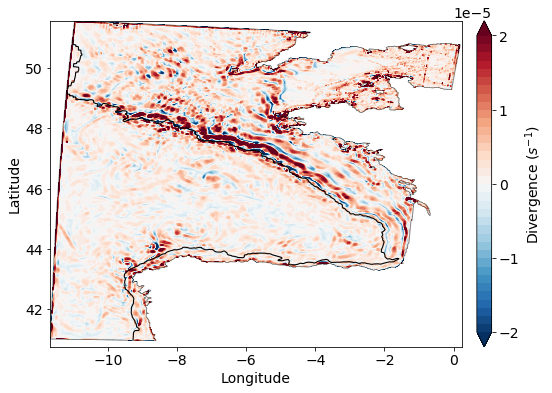

In [23]:
vmin = -.2e-04
vmax = .2e-04
levels = np.linspace(vmin,vmax,37, endpoint=True)
ticks = np.arange(-0.2,0.2,0.1)
opts = {"label": 'Divergence [$s^{-1}$]', 'ticks': ticks, 'pad': 0.02}

# make plot
fig = plt.figure(figsize=(9,6))
axes = fig.add_subplot(111)

# plot summer (TON)
mask = np.isnan(div_ref.div[0,:,:])
im0 = div_ref.sel(time_counter='2011-09-28T12:00:00.000000000').div.plot.contourf(ax=axes, x='nav_lon', y='nav_lat', \
                                                                                  levels=levels, vmin=vmin, vmax=vmax, \
                                                                                  cmap='RdBu_r', add_colorbar=False)

# plot colorbar 
cb = plt.colorbar(im0, orientation='vertical', extend='both', label='Divergence ($s^{-1}$)', pad=0.03)
cb.set_ticks(np.arange(-.4e-04,1e-03,.1e-04))
cb.formatter.set_powerlimits((0,0))
cb.update_ticks()

# plot coastlines and 200-m isobath
mask.plot.contour(ax=axes, x='nav_lon', y='nav_lat', linewidths=0.1, colors='k')
bathy.Bathymetry.plot.contour(ax=axes, x='nav_lon', y='nav_lat', levels=[200], linewidths=1.1, colors='k')

# adjust axes labels
axes.set_xlabel('Longitude')
axes.set_ylabel('Latitude')
axes.set_title('')

#save figure
fig.savefig('../_plots/figure8.png',dpi=300,bbox_inches='tight')

#### TOFF 

Text(0.5, 1.0, '')

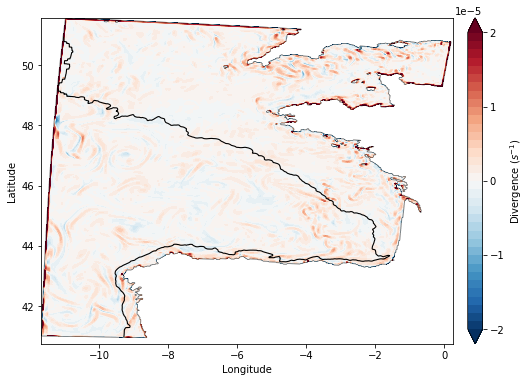

In [16]:
vmin = -.2e-04
vmax = .2e-04
levels = np.linspace(vmin,vmax,37, endpoint=True)
ticks = np.arange(-0.2,0.2,0.1)
opts = {"label": 'Divergence [$s^{-1}$]', 'ticks': ticks, 'pad': 0.02}

# make plot
fig = plt.figure(figsize=(9,6))
axes = fig.add_subplot(111)

# plot summer (TON)
mask = np.isnan(div_ref.div[0,:,:])
im0 = div_exp1.sel(time_counter='2011-09-28T12:00:00.000000000').div.plot.contourf(ax=axes, x='nav_lon', y='nav_lat', levels=levels, vmin=vmin, vmax=vmax, cmap='RdBu_r', add_colorbar=False)#, cbar_kwargs=opts)

# plot colorbar 
cb = plt.colorbar(im0, orientation='vertical', extend='both', label='Divergence ($s^{-1}$)', pad=0.03)
cb.set_ticks(np.arange(-.4e-04,1e-03,.1e-04))
cb.formatter.set_powerlimits((0,0))
cb.update_ticks()

# plot coastlines and 200-m isobath
mask.plot.contour(ax=axes, x='nav_lon', y='nav_lat', linewidths=0.1, colors='k')
bathy.Bathymetry.plot.contour(ax=axes, x='nav_lon', y='nav_lat', levels=[200], linewidths=1.1, colors='k')

# adjust axes labels
axes.set_xlabel('Longitude')
axes.set_ylabel('Latitude')
axes.set_title('')

#save figure
# fig.savefig('../_plots/tmp-plot.png',dpi=300,bbox_inches='tight')

#### hourly frames

In [16]:
# load data (1h)
root_dir = '/home/gkara/Documents/for-tide_paper/'

div_ref_1h = xr.open_dataset(root_dir + 'TON_div_1h_cr_20200928.nc')
div_ref_1h = div_ref_1h.set_coords(['nav_lon', 'nav_lat'])

In [19]:
div_ref_1h

<xarray.Dataset>
Dimensions:       (depthu: 1, time_counter: 24, x: 388, y: 538)
Coordinates:
    nav_lon       (y, x) float32 ...
    nav_lat       (y, x) float32 ...
  * depthu        (depthu) float32 0.0
  * time_counter  (time_counter) datetime64[ns] 2011-09-28T00:30:00 ... 2011-09-28T23:30:00
Dimensions without coordinates: x, y
Data variables:
    div           (time_counter, y, x) float32 ...
Attributes:
    start_date:        -1
    output_frequency:  N/A
    CONFIG:            N/A
    CASE:              N/A

In [22]:
vmin = -.1e-03
vmax = .1e-03

levels = np.linspace(vmin,vmax,37, endpoint=True)
ticks = np.arange(-0.2,0.2,0.1)
opts = {"label": 'Divergence [$s^{-1}$]', 'ticks': ticks, 'pad': 0.02}

mask = np.isnan(div_ref_1h.div[0,:,:])
for n in range(24):
    
    # make plot
    fig = plt.figure(figsize=(9,6))
    axes = fig.add_subplot(111)

    # plot summer (TON)
    im0 = div_ref_1h.isel(time_counter=n).div.plot.contourf(ax=axes, x='nav_lon', y='nav_lat', levels=levels, vmin=vmin, vmax=vmax, cmap='RdBu_r', add_colorbar=False)#, cbar_kwargs=opts)

    # plot colorbar 
    cb = plt.colorbar(im0, orientation='vertical', extend='both', label='Divergence ($s^{-1}$)', pad=0.03)
    cb.set_ticks(np.arange(-.4e-03,1e-02,.1e-03))
    cb.formatter.set_powerlimits((0,0))
    cb.update_ticks()

    # plot coastlines and 200-m isobath
    mask.plot.contour(ax=axes, x='nav_lon', y='nav_lat', linewidths=0.1, colors='k')
    bathy.Bathymetry.plot.contour(ax=axes, x='nav_lon', y='nav_lat', levels=[200], linewidths=1.1, colors='k')

    # adjust axes labels
    axes.set_xlabel('Longitude')
    axes.set_ylabel('Latitude')
    
    time = str(div_ref_1h.coords['time_counter'].values[n] - np.timedelta64(1, 'h'))[:19]
    title = time.split('T')[0] + " " + time.split('T')[1]

    axes.set_title(title)

    #save figure
    fig.savefig('../_plots/div_movie_frames_1h/div' +  f"{n:03}." + '.png',dpi=300,bbox_inches='tight')
    plt.close()